# Import Data Library Yang Dibutuhkan

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Membaca Dataset

In [2]:
df = pd.read_csv('ElectricVehicle_PopulationFiltering.csv')

In [3]:
df.head()

,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Electric Utility
0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.912387,PACIFICORP
1,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.652568,PACIFICORP
2,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.235650,PUGET SOUND ENERGY INC
3,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,0.096677,PUGET SOUND ENERGY INC
4,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.616314,PUGET SOUND ENERGY INC


In [4]:
df

,Model Year,Make,Model,Electric Vehicle Type,CAFV,Electric Range,Electric Utility
0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.912387,PACIFICORP
1,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.652568,PACIFICORP
2,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.235650,PUGET SOUND ENERGY INC
3,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,0.096677,PUGET SOUND ENERGY INC
4,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.616314,PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...
18486,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.610272,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
18487,2017,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.305136,PUGET SOUND ENERGY INC
18488,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.226586,PUGET SOUND ENERGY INC
18489,2018,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,0.060423,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


# Preprocessing Dataset

In [5]:
# Menampilkan tipe data dari setiap kolom
print(df.dtypes)

Model Year                 int64
Make                      object
Model                     object
Electric Vehicle Type     object
CAFV                      object
Electric Range           float64
Electric Utility          object
dtype: object


In [6]:
# Membaca dataset dari file CSV
df = pd.read_csv('ElectricVehicle_PopulationFiltering.csv')

# Memeriksa tipe data kolom
print("Tipe data sebelum encoding:")
print(df.dtypes)

# Melakukan One-Hot Encoding pada kolom kategorikal
df_cols = pd.get_dummies(df, drop_first=True)

# Memeriksa dataset yang telah dienkode
print("Dataset setelah One-Hot Encoding:")
print(df_cols.head())

Tipe data sebelum encoding:
Model Year                 int64
Make                      object
Model                     object
Electric Vehicle Type     object
CAFV                      object
Electric Range           float64
Electric Utility          object
dtype: object
Dataset setelah One-Hot Encoding:
   Model Year  Electric Range  Make_AZURE DYNAMICS  Make_BENTLEY  Make_BMW  \
0        2020        0.912387                False         False     False   
1        2021        0.652568                False         False     False   
2        2015        0.235650                False         False     False   
3        2013        0.096677                False         False     False   
4        2016        0.616314                False         False     False   

   Make_CADILLAC  Make_CHEVROLET  Make_CHRYSLER  Make_FIAT  Make_FISKER  ...  \
0          False           False          False      False        False  ...   
1          False           False          False      False      

In [7]:
# Memeriksa tipe data kolom
print("Tipe data sebelum encoding:")
print(df.dtypes)

# Mengonversi kolom boolean menjadi 0 dan 1
for col in df_cols.select_dtypes(include=['bool']).columns:
    df_cols[col] = df_cols[col].astype(int)

# Memeriksa dataset yang telah dienkode dan dikonversi
print("Dataset setelah One-Hot Encoding dan konversi boolean:")
print(df_cols.head())

Tipe data sebelum encoding:
Model Year                 int64
Make                      object
Model                     object
Electric Vehicle Type     object
CAFV                      object
Electric Range           float64
Electric Utility          object
dtype: object
Dataset setelah One-Hot Encoding dan konversi boolean:
   Model Year  Electric Range  Make_AZURE DYNAMICS  Make_BENTLEY  Make_BMW  \
0        2020        0.912387                    0             0         0   
1        2021        0.652568                    0             0         0   
2        2015        0.235650                    0             0         0   
3        2013        0.096677                    0             0         0   
4        2016        0.616314                    0             0         0   

   Make_CADILLAC  Make_CHEVROLET  Make_CHRYSLER  Make_FIAT  Make_FISKER  ...  \
0              0               0              0          0            0  ...   
1              0               0           

In [8]:
df_cols

,Model Year,Electric Range,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_FIAT,Make_FISKER,...,Electric Utility_PORTLAND GENERAL ELECTRIC CO,Electric Utility_PUD NO 1 OF CHELAN COUNTY,Electric Utility_PUD NO 1 OF DOUGLAS COUNTY,Electric Utility_PUD NO 1 OF OKANOGAN COUNTY,Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY,Electric Utility_PUD NO 1 OF WHATCOM COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY
0,2020,0.912387,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,0.652568,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0.235650,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2013,0.096677,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2016,0.616314,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18486,2013,0.610272,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18487,2017,0.305136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18488,2017,0.226586,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
18489,2018,0.060423,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Menampilkan tipe data dari setiap kolom
print(df.dtypes)

Model Year                 int64
Make                      object
Model                     object
Electric Vehicle Type     object
CAFV                      object
Electric Range           float64
Electric Utility          object
dtype: object


# Menentukan Jumlah Cluster dengan Elbow

Text(0, 0.5, 'inertia')

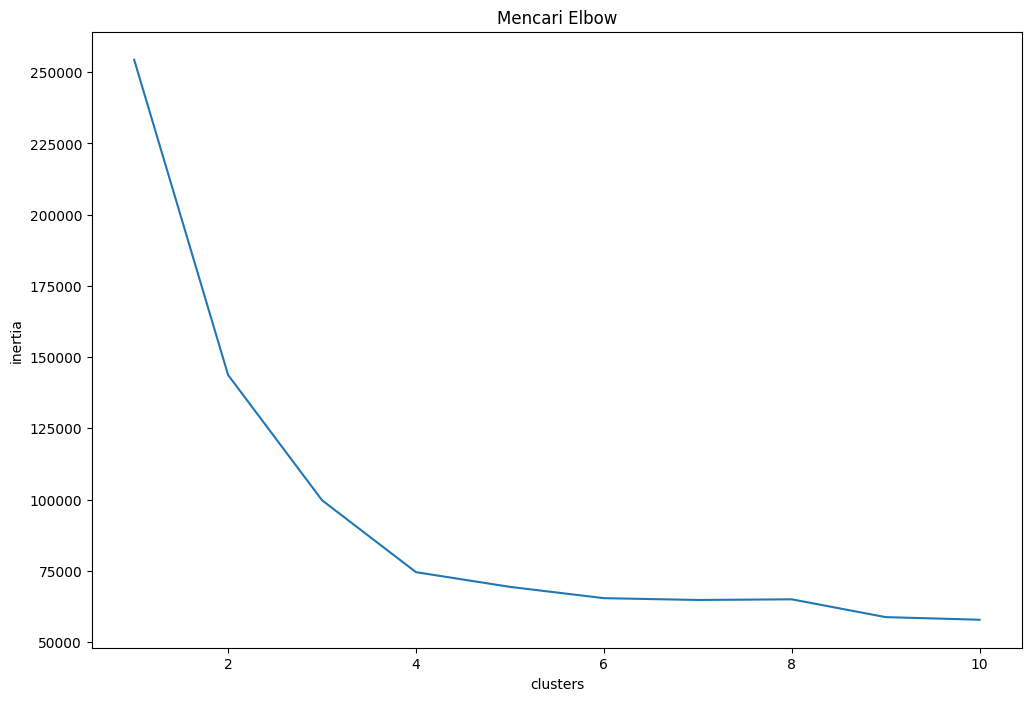

In [33]:
clusters=[]
for i in range(1,11):
    km =KMeans(n_clusters=i).fit(df_cols)
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Mencari Elbow')
ax.set_xlabel('clusters')
ax.set_ylabel('inertia')

# Proses Clustering

In [34]:
n_clust = 3
kmean = KMeans(n_clusters=n_clust).fit(df_cols)
df_cols['Labels'] = kmean.labels_

In [35]:
df_cols

,Model Year,Electric Range,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_FIAT,Make_FISKER,...,Electric Utility_PUD NO 1 OF CHELAN COUNTY,Electric Utility_PUD NO 1 OF DOUGLAS COUNTY,Electric Utility_PUD NO 1 OF OKANOGAN COUNTY,Electric Utility_PUD NO 1 OF PEND OREILLE COUNTY,Electric Utility_PUD NO 1 OF WHATCOM COUNTY,Electric Utility_PUD NO 2 OF GRANT COUNTY,Electric Utility_PUGET SOUND ENERGY INC,Electric Utility_PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),Electric Utility_PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM COUNTY,Labels
0,2020,0.912387,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021,0.652568,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015,0.235650,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2013,0.096677,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,2016,0.616314,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18486,2013,0.610272,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
18487,2017,0.305136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
18488,2017,0.226586,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
18489,2018,0.060423,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2


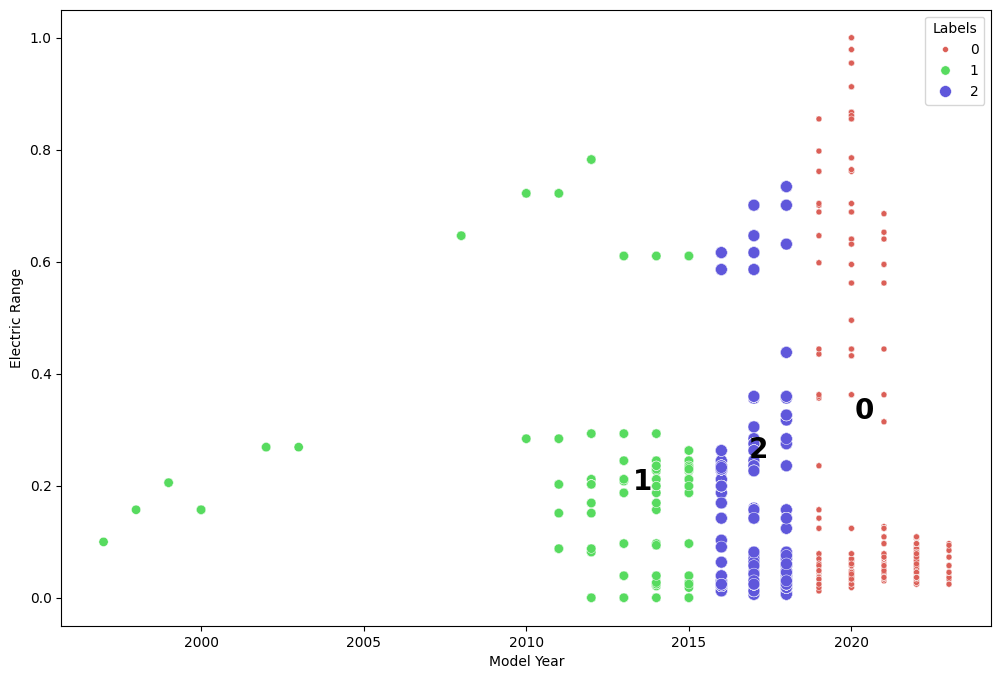

In [36]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Model Year', y='Electric Range', hue='Labels', size='Labels', palette=sns.color_palette('hls', n_clust), data=df_cols)

for label in df_cols['Labels'].unique():
    mean_model_year = df_cols[df_cols['Labels'] == label]['Model Year'].mean()
    mean_electric_range = df_cols[df_cols['Labels'] == label]['Electric Range'].mean()
    plt.annotate(label,
                 (mean_model_year, mean_electric_range),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='black')

plt.show()


In [37]:
df_cols.to_csv('data_filteringfinish4.csv', index=False)